# Artem Ivaniuk, Stat 565, HW 2

For this homework Jupyter notebook, the code is in the gray boxes with my write-ups/answers following right after each section in the white boxes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

cols = ["yearmonth", "total", "west", "east"]

df = pd.read_csv(
    "hawaii-new.dat",
    sep='\s+',
    header=None,
    names=cols,
)

# Year code: 70 -> 1970, ..., 95 -> 1995
years = 1900 + (df["yearmonth"] // 100)
months = df["yearmonth"] % 100

dates = pd.to_datetime(
    {
        "year": years,
        "month": months,
        "day": 1,
    }
)

df["date"] = dates

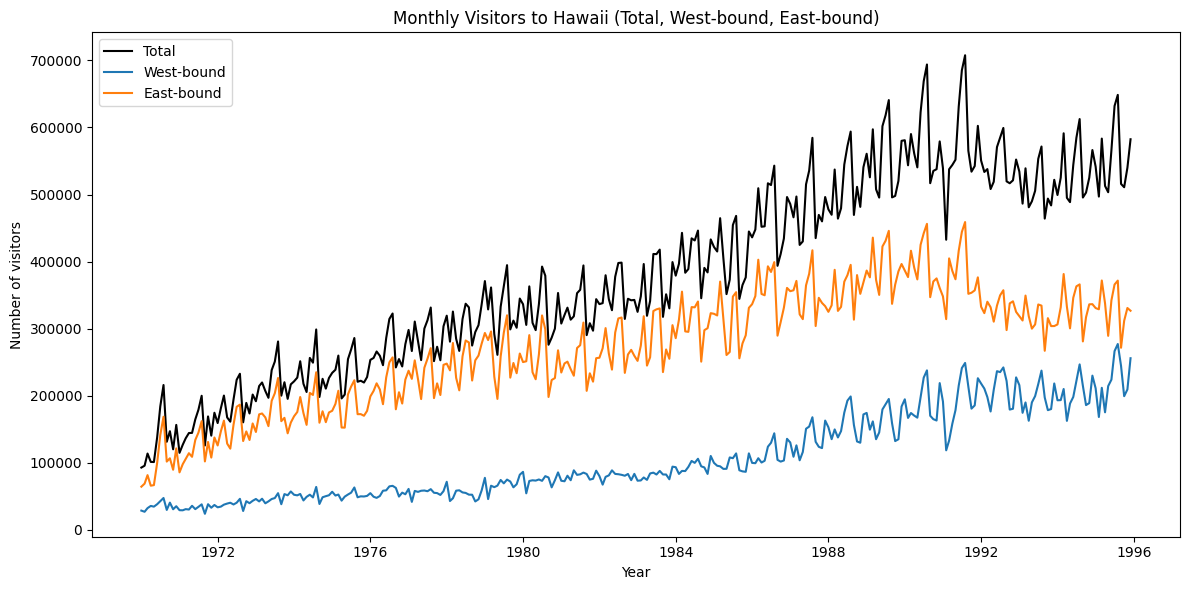

In [111]:
# 1(a)
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["total"], label="Total", color="black")
plt.plot(df["date"], df["west"], label="West-bound", color="tab:blue")
plt.plot(df["date"], df["east"], label="East-bound", color="tab:orange")
plt.xlabel("Year")
plt.ylabel("Number of visitors")
plt.title("Monthly Visitors to Hawaii (Total, West-bound, East-bound)")
plt.legend()
plt.tight_layout()
plt.show()

### 1(a)

Looking at the time series plots of the three visitor series, I observe several key features:

Trend: All three series show a clear upward trend over the 26-year period from 1970 to 1995.
The total number of visitors increases substantially, roughly tripling or quadrupling from the
early 1970s to the mid-1990s. The east-bound series shows the steepest growth rate, starting lower than west-bound in the early years but eventually surpassing it and becoming the dominant component. The west-bound series also grows but at a more moderate pace.

Seasonality: There is strong seasonal variation in all three series, with a consistent
pattern repeating each year. The peaks typically occur during summer months and winter holiday periods, while troughs appear in the fall months and early spring with the seasonal pattern is consistent
across all years.

Variance: The variance appears to increase over time, especially in the total and
east-bound series. In the early years, the seasonal swings are relatively small, but as the
overall level increases, the magnitude of seasonal fluctuations also increases. 

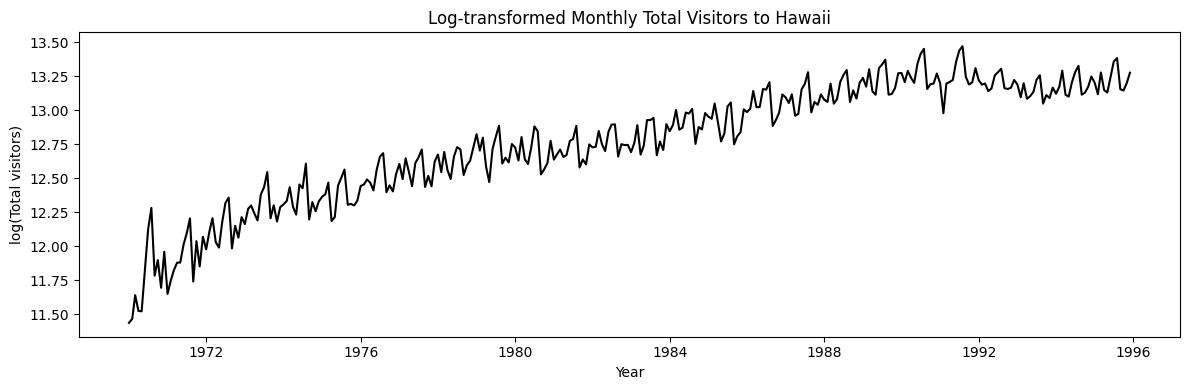

In [112]:
# 1(b): log transformation
log_total = np.log(df["total"])

plt.figure(figsize=(12, 4))
plt.plot(df["date"], log_total, color="black")
plt.xlabel("Year")
plt.ylabel("log(Total visitors)")
plt.title("Log-transformed Monthly Total Visitors to Hawaii")
plt.tight_layout()
plt.show()

### 1(b)

After applying the log transformation to the total visitor series, there are several important
changes:

Variance stabilization: In the original
series, the variance increased over time as the level increased. After the
log transformation, the variance appears much more stable across the entire time period. The
seasonal fluctuations now have roughly similar magnitude in both the early and late years

Trend: The upward trend remains clearly visible but is now more linear-looking on the log
scale. The growth appears more consistent over time, which suggests that the percentage growth
rate (rather than absolute growth) may be relatively stable

Seasonality: The seasonal pattern is still very evident after the log transformation. The
within-year cycles remain prominent, with the same peaks in summer and winter months and
troughs in fall and early spring. The seasonal swings are now more uniform in magnitude
throughout the series though, which makes it easier to analyze for the future.

F-test (linear vs quadratic):
  F-statistic: 212.2829
  p-value: 0.0000

F-test (quadratic vs cubic):
  F-statistic: 2.8224
  p-value: 0.0940

Quadratic model selected (p < 0.05)


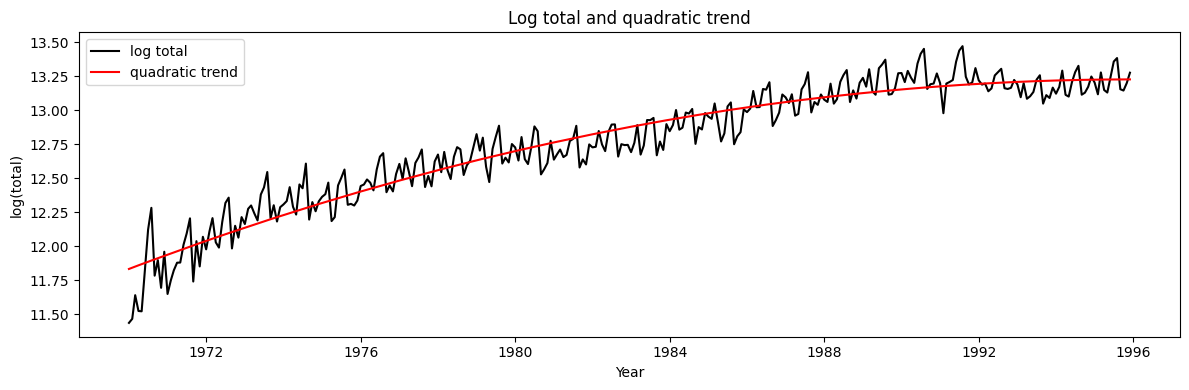

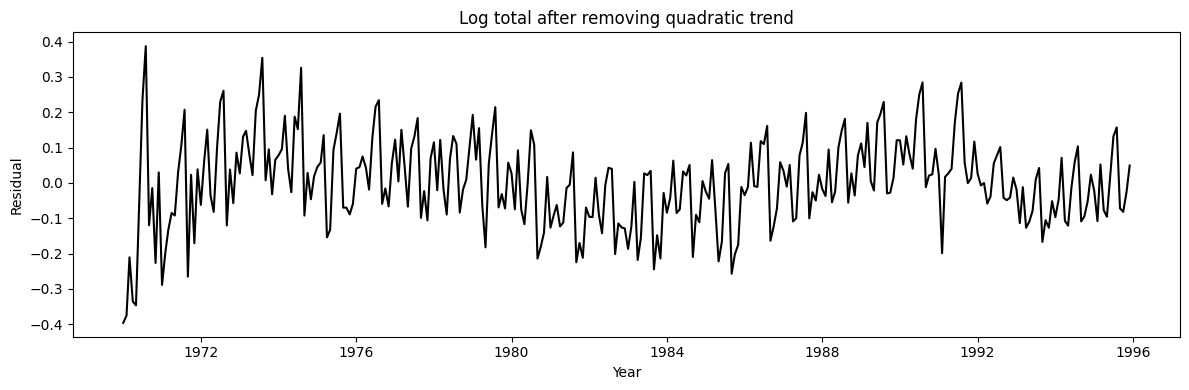

In [113]:
# 1(c): polynomial
log_total = np.log(df["total"])

t = np.arange(len(df))

X1 = sm.add_constant(t)
X2 = sm.add_constant(np.column_stack([t, t**2]))
X3 = sm.add_constant(np.column_stack([t, t**2, t**3]))

m1 = sm.OLS(log_total, X1).fit()
m2 = sm.OLS(log_total, X2).fit()
m3 = sm.OLS(log_total, X3).fit()

# F-test: linear vs quadratic
f_test_1v2 = m2.compare_f_test(m1)
print("F-test (linear vs quadratic):")
print(f"  F-statistic: {f_test_1v2[0]:.4f}")
print(f"  p-value: {f_test_1v2[1]:.4f}")

# F-test: quadratic vs cubic
f_test_2v3 = m3.compare_f_test(m2)
print("\nF-test (quadratic vs cubic):")
print(f"  F-statistic: {f_test_2v3[0]:.4f}")
print(f"  p-value: {f_test_2v3[1]:.4f}")

if f_test_2v3[1] < 0.05:
    trend_hat = m3.fittedvalues
    print("\nCubic model selected (p < 0.05)")
elif f_test_1v2[1] < 0.05:
    trend_hat = m2.fittedvalues
    print("\nQuadratic model selected (p < 0.05)")
else:
    trend_hat = m1.fittedvalues
    print("\nLinear model selected")

df["trend_log_quad"] = trend_hat

plt.figure(figsize=(12, 4))
plt.plot(df["date"], log_total, label="log total", color="black")
plt.plot(df["date"], trend_hat, label="quadratic trend", color="red")
plt.xlabel("Year")
plt.ylabel("log(total)")
plt.title("Log total and quadratic trend")
plt.legend()
plt.tight_layout()
plt.show()

resid_trend = log_total - trend_hat

plt.figure(figsize=(12, 4))
plt.plot(df["date"], resid_trend, color="black")
plt.xlabel("Year")
plt.ylabel("Residual")
plt.title("Log total after removing quadratic trend")
plt.tight_layout()
plt.show()

### 1(c)

Polynomial order selection: To determine which polynomial order to use, I employed F-tests
for nested model comparison. The test
statistic follows an F-distribution under the null hypothesis that the simpler model is
enough/accurate

I performed two sequential F-tests:
1. Linear vs quadratic: This tests whether adding a quadratic term (t²) significantly
   improves the model beyond a linear trend. The F-test was highly significant (F = 212.28,
   p < 0.001), indicating that the quadratic term is necessary and provides substantial
   improvement over a simple linear trend.
2. Quadratic vs cubic: This tests whether adding a cubic term (t³) significantly improves
   the quadratic model. The F-test was not significant (F = 2.82, p = 0.094), meaning the cubic
   term does not provide meaningful improvement and would likely just overfit the data.

Based on these results, I selected the quadratic model as the highest order
that shows statistically significant improvement.

Drew inspiration for the test and code from:
1. https://www.geeksforgeeks.org/machine-learning/how-to-perform-an-f-test-in-python/
2. https://www.datasciencewithmarco.com/blog/basic-statistics-for-time-series-analysis-in-python

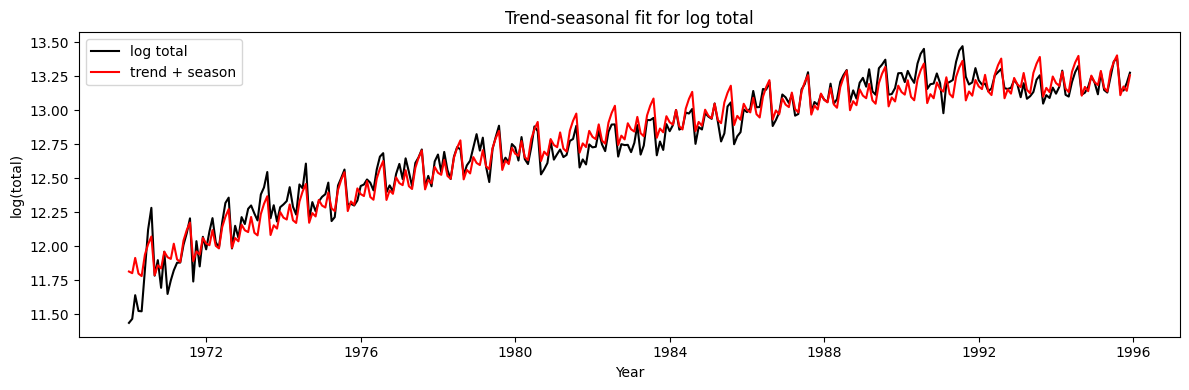

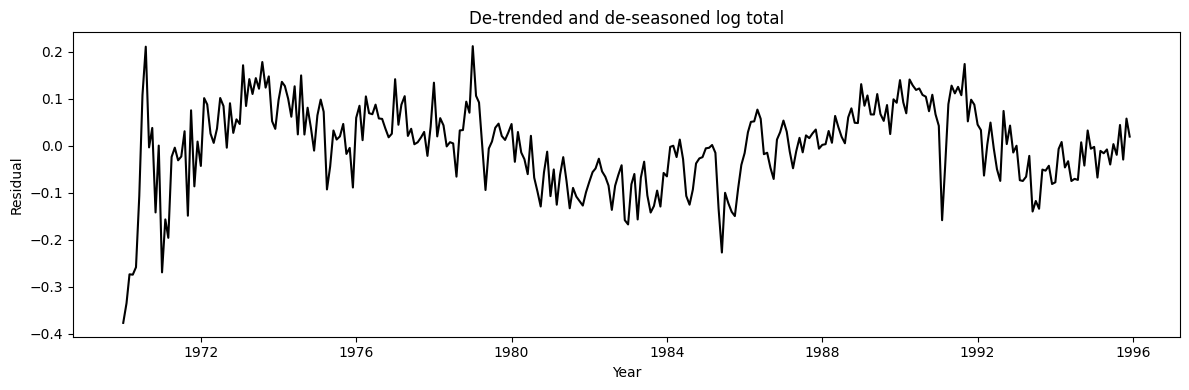

m_2    -0.021220
m_3     0.082243
m_4    -0.041940
m_5    -0.068848
m_6     0.080166
m_7     0.147067
m_8     0.195449
m_9    -0.097145
m_10   -0.033326
m_11   -0.065302
m_12    0.048742
dtype: float64


In [114]:
# 1(d): trend-seasonal model for log total
log_total = np.log(df["total"])

t = np.arange(len(df))
df["t"] = t
df["t2"] = t**2

df["month"] = df["date"].dt.month
month_dummies = pd.get_dummies(df["month"], prefix="m", drop_first=True)

X_ts = pd.concat([df[["t", "t2"]], month_dummies], axis=1)
X_ts = sm.add_constant(X_ts)

X_ts = X_ts.astype(float)
log_total = log_total.astype(float)

model_ts = sm.OLS(log_total, X_ts).fit()

df["fitted_ts"] = model_ts.fittedvalues
resid_ts = log_total - df["fitted_ts"]

plt.figure(figsize=(12, 4))
plt.plot(df["date"], log_total, label="log total", color="black")
plt.plot(df["date"], df["fitted_ts"], label="trend + season", color="red")
plt.xlabel("Year")
plt.ylabel("log(total)")
plt.title("Trend-seasonal fit for log total")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["date"], resid_ts, color="black")
plt.xlabel("Year")
plt.ylabel("Residual")
plt.title("De-trended and de-seasoned log total")
plt.tight_layout()
plt.show()

seasonal_params = model_ts.params[model_ts.params.index.str.startswith("m_")]
print(seasonal_params)

### 1(d)

I fit a trend-seasonal model to the log-transformed total series using
the same quadratic time trend (t and t²) as selected in part 1(c), plus monthly dummy
variables to capture seasonal effects. January is used as the baseline month, so the coefficients for other months represent deviations from January's average level.

After removing both the trend and seasonal components, the residuals look roughly centered around zero with no strong remaining seasonal pattern.

Seasonal coefficients: 
- Positive coefficients (above January): March: 0.082, June: 0.080, July: 0.147, August: 0.195, and December: 0.049 have positive seasonal effects. Thinking of the school calendar, I would suspect the positive deviations to correspond to spring break, summer vacation, and winter holiday periods
- Negative coefficients (below January): February: -0.021, April: -0.042, May: -0.069, September: -0.097, October: -0.033, and November: -0.065 have negative seasonal effects. These would correspond to busy school months, so lower tourism makes sense.

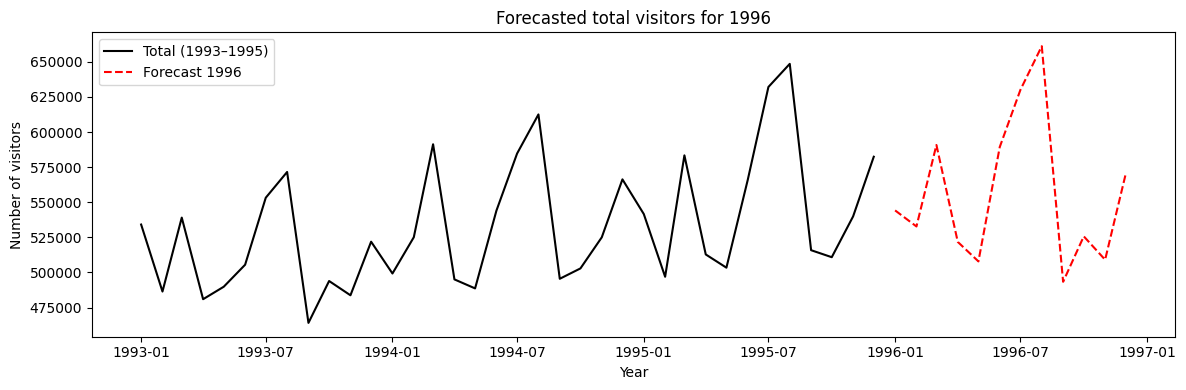

In [115]:
# 1(e): forecasts 
last_t = int(df["t"].iloc[-1])

t_1996 = list(range(last_t + 1, last_t + 13))
dates_1996 = pd.date_range(start="1996-01-01", periods=12, freq="MS")
months_1996 = dates_1996.month.tolist()

t2_1996 = [v**2 for v in t_1996]

new_df = pd.DataFrame(
    {
        "t": t_1996,
        "t2": t2_1996,
        "month": months_1996,
    }
)

month_dummies_1996 = pd.get_dummies(new_df["month"], prefix="m", drop_first=True)

X_1996 = pd.concat([new_df[["t", "t2"]], month_dummies_1996], axis=1)
X_1996 = X_1996.reindex(columns=X_ts.columns.drop("const"), fill_value=0)
X_1996 = sm.add_constant(X_1996)

pred_1996_log = model_ts.predict(X_1996)
pred_1996 = pred_1996_log.apply(math.exp)

mask_last3 = df["date"] >= "1993-01-01"
df_last3 = df.loc[mask_last3]

plt.figure(figsize=(12, 4))
plt.plot(df_last3["date"], df_last3["total"], label="Total (1993–1995)", color="black")
plt.plot(dates_1996, pred_1996, "--", label="Forecast 1996", color="red")
plt.xlabel("Year")
plt.ylabel("Number of visitors")
plt.title("Forecasted total visitors for 1996")
plt.legend()
plt.tight_layout()
plt.show()

### 1(e)

The forecast is shown in red at the plot above.

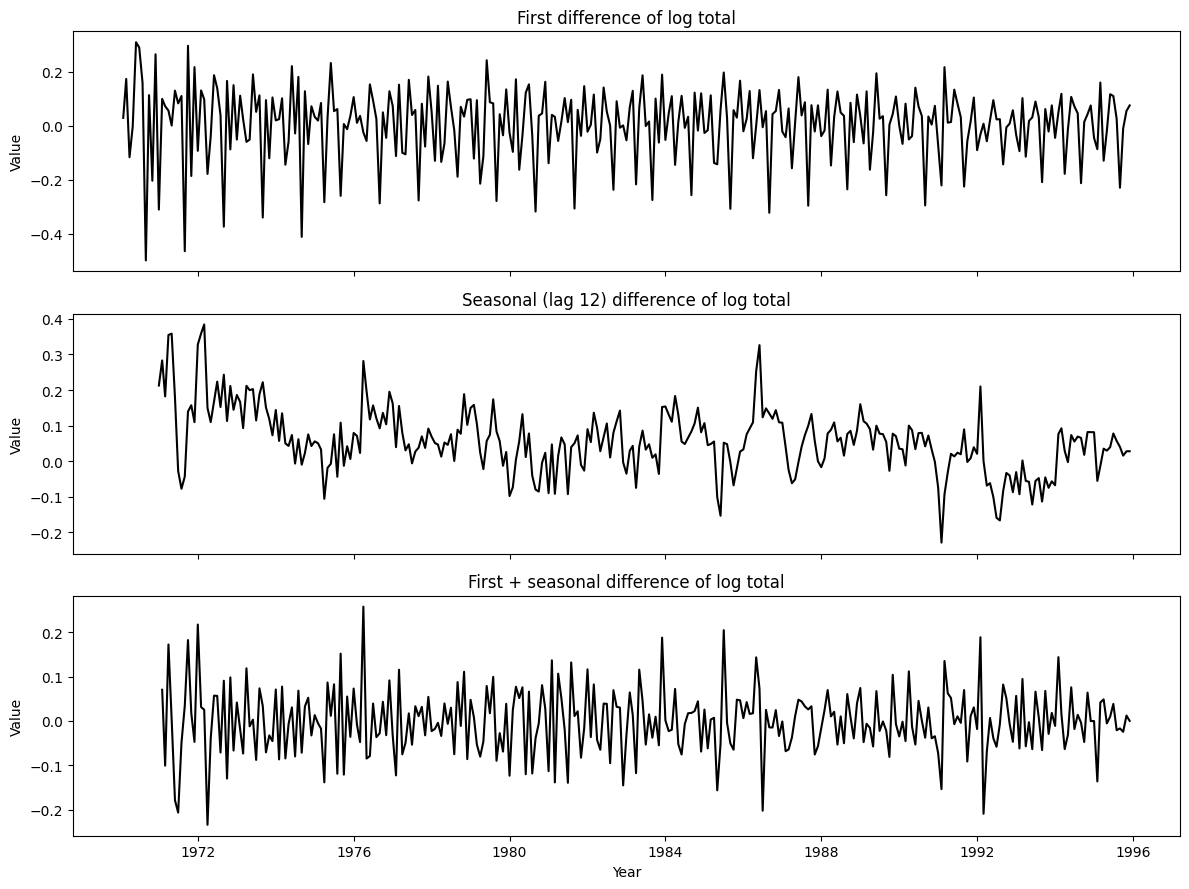

In [116]:
# 1(f): differencing 
log_total = np.log(df["total"])

diff1 = log_total.diff(1)
diff12 = log_total.diff(12)
diff1_12 = log_total.diff(1).diff(12)

fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
axes[0].plot(df["date"], diff1, color="black")
axes[0].set_title("First difference of log total")
axes[1].plot(df["date"], diff12, color="black")
axes[1].set_title("Seasonal (lag 12) difference of log total")
axes[2].plot(df["date"], diff1_12, color="black")
axes[2].set_title("First + seasonal difference of log total")
for ax in axes:
    ax.set_ylabel("Value")
axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()

### 1(f)

To determine the differences needed to make the log-transformed total
series stationary, I tested three checks:

1. First difference (lag 1): This removes the trend by taking x_t - x_{t-1}. Looking at
   the plot, the first-differenced series still shows a clear seasonal pattern with regular
   within-year cycles

2. Seasonal difference (lag 12): This removes seasonality by taking x_t - x_{t-12}, which
   compares each month to the same month in the previous year. The seasonally differenced series
   shows a slow, persistent trend remaining. This makes sense because seasonal
   differences don't address the overall growth trend in the series

3. First + seasonal difference: This applies both operations sequentially: first the regular
   difference, then the seasonal difference of the result, giving (x_t - x_{t-1}) - (x_{t-12} - x_{t-13}). After applying both differences, the series looks much more stable in both mean
   and variance. There is no obvious remaining trend, and the strong seasonality has been
   removed. The series fluctuates around a roughly constant level with relatively stable
   variance

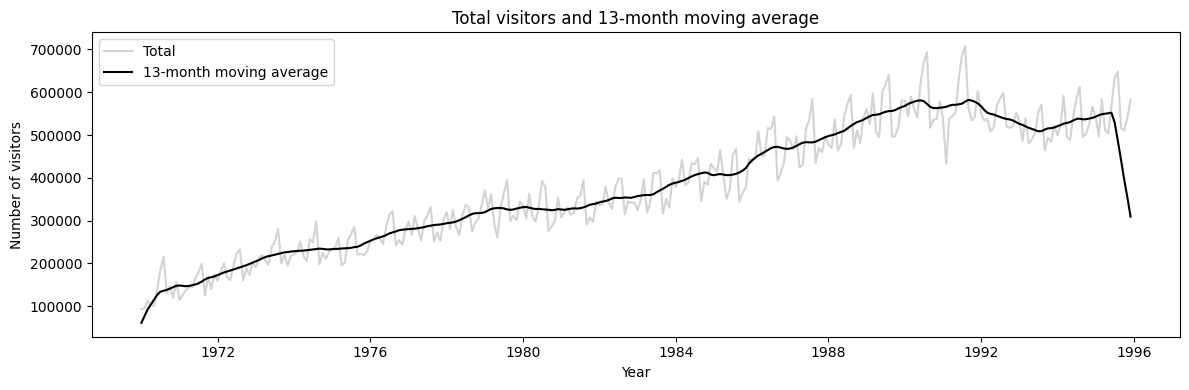

In [117]:
# 1(g): 13-month MA
w = np.array([0.5] + [1] * 11 + [0.5]) / 12.0
ma13 = np.convolve(df["total"], w, mode="same")

df["ma13"] = ma13

plt.figure(figsize=(12, 4))
plt.plot(df["date"], df["total"], label="Total", color="lightgray")
plt.plot(df["date"], df["ma13"], label="13-month moving average", color="black")
plt.xlabel("Year")
plt.ylabel("Number of visitors")
plt.title("Total visitors and 13-month moving average")
plt.legend()
plt.tight_layout()
plt.show()

### 1(g)

The smoothed series (black line) shows a clear upward trend that rises over time, with a few dips corresponding to periods of weaker tourism. The seasonal cycles in
the raw data (light gray line) mostly oscillate around this smooth trend line, without much seasonality/pattern to its changes, hence making the iid assumption reasonable for the future analysis

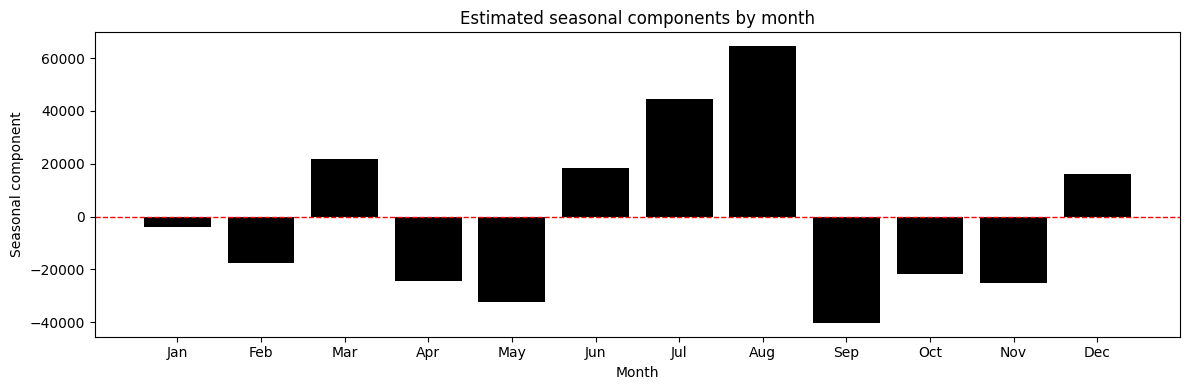

In [118]:
# 1(h): 
tilde_x = df["total"] - df["ma13"]

df["tilde_x"] = tilde_x

month = df["date"].dt.month
seasonal_raw = tilde_x.groupby(month).mean()

seasonal_centered = seasonal_raw - seasonal_raw.mean()

seasonal_index = month.map(seasonal_centered)

df["s_hat"] = seasonal_index

plt.figure(figsize=(12, 4))
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(range(1, 13), seasonal_centered, color="black")
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Month")
plt.ylabel("Seasonal component")
plt.title("Estimated seasonal components by month")
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

### 1(h)

Using the de-trended series \(\tilde{x}_t = x_t - \hat{m}_t\) to estimate the seasonal components \(\hat{s}_t\), for each month (January through December) I calculated the
average of \(\tilde{x}_t\) across all years. This gives the typical seasonal deviation for each
month after removing the trend, which I then centered using the past 12 values.

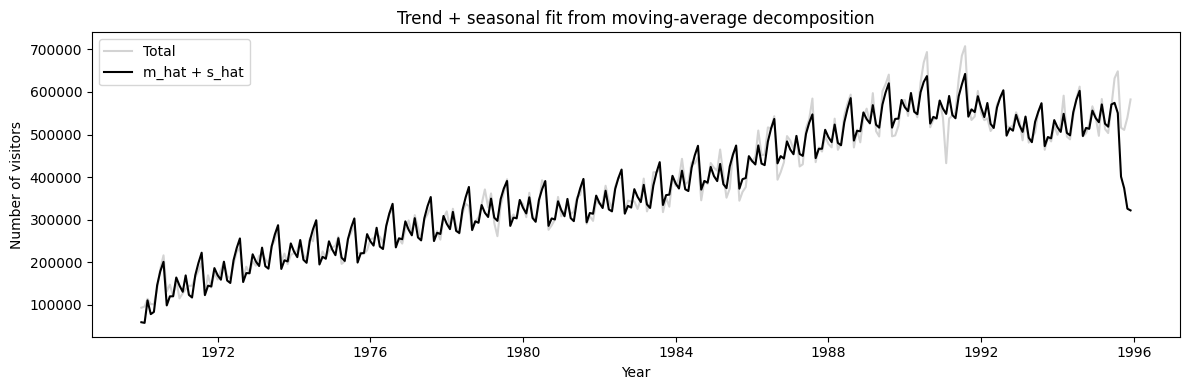

In [119]:
# 1(i): 
x_deseasoned = df["total"] - df["s_hat"]

w = np.array([0.5] + [1] * 11 + [0.5]) / 12.0
trend2 = np.convolve(x_deseasoned, w, mode="same")

df["m_hat"] = trend2

reconstructed = df["m_hat"] + df["s_hat"]

plt.figure(figsize=(12, 4))
plt.plot(df["date"], df["total"], label="Total", color="lightgray")
plt.plot(df["date"], reconstructed, label="m_hat + s_hat", color="black")
plt.xlabel("Year")
plt.ylabel("Number of visitors")
plt.title("Trend + seasonal fit from moving-average decomposition")
plt.legend()
plt.tight_layout()
plt.show()

### 1(i)

See the plot right above. Seems that it captures majority of the movements fairly well, except the volatilty breakout around 1992 and 1995. 

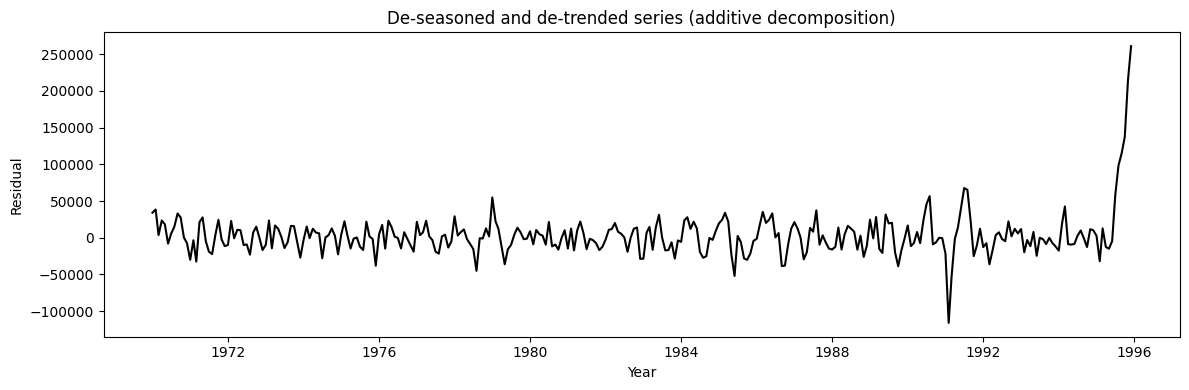

In [120]:
# 1(j): de-seasoned and de-trended 
residual_add = df["total"] - df["s_hat"] - df["m_hat"]

plt.figure(figsize=(12, 4))
plt.plot(df["date"], residual_add, color="black")
plt.xlabel("Year")
plt.ylabel("Residual")
plt.title("De-seasoned and de-trended series (additive decomposition)")
plt.tight_layout()
plt.show()

### 1(j)

The final residual series fluctuates around a roughly constant level (zero)
with no obvious systematic trend or strong remaining seasonality, apart from the breakout at 1996 - which I do think is simply a residual that couldn't have been predicted by trend or seasonality, hence simply making it a statistically rare large movement

Compared with the residuals from the parametric trend-seasonal
model in part 1(d), these residuals look similar in overall size and behavior. Visually, both show
roughly centered variation around zero with no strong remaining patterns, but the plot in 1(d) looks much less cohesive and seems to have a slight seasonal component to it on a large scale while the plot here is very similar in looks to the white noise behavior from class